# LIBRARIES

In [1]:
import Learner
from Environment import Environment
from UserCat import UserCat
from Product import Product
from Greedy_optimizer import *
import numpy as np


# TESTING of ENVIRONMENT.py

In [2]:
users=[]
products=[]

nameofproduct= [ #name of products
    "Calabazas",
    "Hinojo",
    "Sesamo",
    "Girasol",
    "Amapola"
]

prices=[[4., 6, 7, 8],
    [9., 13, 17, 21],
    [18., 20, 22, 24],
    [24., 26, 28, 30],
    [33., 35, 37, 39]]
#1-2 di delta, Con sovrapposizione

cost=[2,4.5,9,14,17]

#sarebbe interessante anche prendere da file il tutto così da cambiare tutto più facilmente
#calcolo i margini dai cost mi sembra più sensato e anche più veloce se dobbiamo cambiare continuamente

cost2 = np.tile(np.array([cost]).transpose(), (1, 4))
margins = np.array(prices)-cost2

Secondary_dict={           # Propongo i prodotti più simili a quello mostrato --> problemino: 2 viene mostrato quasi sempre
    "Calabazas": [1,2],
    "Hinojo": [0,2],
    "Sesamo": [1,3],
    "Girasol": [2,4],
    "Amapola": [2,3]
}

res_price_params = {
    "shape": 150,  # media è shape*scale, la varianza è shape*scale^2
    "scale": 0.2,
    "max" : 60,
    "min" : 5
}

np.random.seed(1)
probabilities = np.random.uniform(0.0, 1, (5, 5))


alphas=[1/5, 1/5, 1/5, 1/5, 1/5] 
# per ora li generiamo così, tutti uguali -> devo generare 3 diversi vettori alpha

poisson_lambda = 1
#=valore atteso del numero di prodotti acquistati (specifico per prodotto)...non dipende dal
#prodotto oltre che dallo user che dal tipo di user che

p_users = [4/9, 3/9, 2/9] #probabilità di essere un tipo di utente-> da cambiare

lambda_q = 0.5 #just my idea of lambda
#possiamo stimarlo con i dati passati provenienti dal sito -> vino tot è stato comprato 15 volte

#proviamo a pensare, ha senso vederlo come coppia? categoria-prodotto? Avrei 3 categorie *5 prodotti-> 15 lambda diversi
# ^^ Andre: secondo me ha senso avere 3 lambda_q diversi per categoria MA non per prodotto. La probabilità di continuare
#           a guardare secondo me dipende dall'utente e non dal prodotto

for i in range (5):
    products.append(Product(prices[i], i, nameofproduct[i],margins[i]))

for i in range(3):
    users.append(UserCat(alphas, res_price_params, poisson_lambda, probabilities))

Env = Environment(users, products,  lambda_q, Secondary_dict, p_users)


In [3]:
probabilities

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
        1.46755891e-01],
       [9.23385948e-02, 1.86260211e-01, 3.45560727e-01, 3.96767474e-01,
        5.38816734e-01],
       [4.19194514e-01, 6.85219500e-01, 2.04452250e-01, 8.78117436e-01,
        2.73875932e-02],
       [6.70467510e-01, 4.17304802e-01, 5.58689828e-01, 1.40386939e-01,
        1.98101489e-01],
       [8.00744569e-01, 9.68261576e-01, 3.13424178e-01, 6.92322616e-01,
        8.76389152e-01]])

In [4]:
Env.optimal_reward()

(22.094364052408885, [3, 3, 3, 1, 0])

In [9]:
Env.expected_reward(price_combination = [3, 3, 3, 1, 0])

22.094364052408885

In [4]:
a = Env.simulate_day(10000, [1,1,1,0,1], ["conversion_rate", "alpha_ratios", "products_sold", "graph_weights"])
a


[{'CR_vector': array([0.99999638, 0.99999668, 0.99995074, 0.99987502, 0.02225989]),
  'alpha_ratios': array([0.60795455, 0.2425    , 0.00068182, 0.01727273, 0.13159091]),
  'n_prod_sold': array([1.9824225 , 1.97936289, 2.65780731, 1.81555059, 1.83180683]),
  'graph_weights': array([[0.        , 0.72523093, 0.        , 0.        , 0.        ],
         [0.08434785, 0.        , 0.16213531, 0.        , 0.        ],
         [0.        , 0.66445183, 0.        , 0.66445183, 0.        ],
         [0.        , 0.        , 0.48677806, 0.        , 0.11840547],
         [0.        , 0.        , 0.24979184, 0.33305579, 0.        ]])},
 {'CR_vector': array([0.99889012, 0.99991597, 0.99999459, 0.9947059 , 0.01428469]),
  'alpha_ratios': array([0.        , 0.02332536, 0.01764354, 0.9590311 , 0.        ]),
  'n_prod_sold': array([0.        , 1.60235867, 1.93187595, 1.99466459, 0.        ]),
  'graph_weights': array([[0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.11536982, 0

# Greedy Algorithm Test

In [12]:
greedy_optimizer = Greedy_optimizer(Env)
greedy_optimizer.run()

{'combination': [3, 1, 0, 0, 0], 'expected_reward': 6.217750418430502}

# Distribuzione Gamma 

In [3]:
import scipy.stats


In [14]:
gamma = scipy.stats.gamma(a = 100, scale = 0.2)
gamma.stats(moments= 'mvsk')

(array(20.), array(4.), array(0.2), array(0.06))

In [15]:
res_price_list = []
for i in range(100000) :
    u = np.random.uniform()
    G_Max = gamma.cdf(res_price_params['max'])
    G_Min = gamma.cdf(res_price_params['min'])
    res_price = gamma.ppf(u * (G_Max-G_Min) + G_Min)
    res_price_list.append(res_price)


(0.0, 65.0)

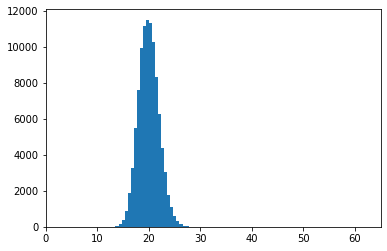

In [16]:
import matplotlib.pyplot as plt

plt.hist(res_price_list, bins = 30)

plt.xlim((0,65))


True